In [1]:
rootF = 'D:/Data/Paper defocus/Defocus detection data/'

In [2]:
import numpy as np
import os.path

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import gridspec
from matplotlib.gridspec import SubplotSpec
from skimage import io
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# Eye model simulation parameters

In [3]:
simulation =  '20210219 Mouse'

PupVals = ['0.80','1.40', '2.00']
dFvals = ['+40', '+30', '+20', '+10', '+00', '-10' , '-20' , '-30', '-40']
dFvals_num = np.linspace(40,-40,9)
SourceVals = ['1','2','3','4']
SourceEcc = ['0','10','20','30']

Ndfs = len(dFvals)
Npup = len(PupVals)
NsrcEcc = len(SourceVals)

psf_pix_size = 1 # um

# Blurred images

In [4]:
# Original images
path_to_original_images = rootF + '/Eye model simulations/original images/'

# Convolved images
imF = rootF + '/Eye model simulations/convolved images/20210219 Mouse/'

# PSFs
path_to_PSFs =  rootF + '/Eye model simulations/mouse PSFs/20210219 Mouse/'

# Figure

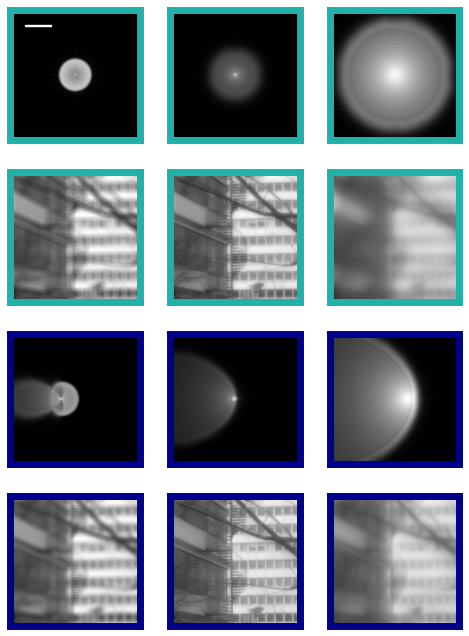

In [5]:
iPup = 1
pup = PupVals[iPup]
colors = ['lightseagreen', 'k','darkblue']

# figure
fig = plt.figure(figsize=(6,8))
gs = fig.add_gridspec(4,3, wspace=0.1, hspace=0.25)

for iSource in [0,2]:
    for idF in [0,4,8]:
        dF = dFvals[idF]
        ### PSF
        psf = np.load(path_to_PSFs + 'pupDiam=' + str(PupVals[iPup]) +\
                                   '_dF=' + str(dFvals[idF]) +  'Source_' + str(SourceVals[iSource]) + '.npy')
        ax = fig.add_subplot(gs[iSource, int(idF/4)])
        ax.imshow(np.log(psf+1), origin='lower',cmap='gray')
        ax.set_yticks([])
        ax.set_xticks([])
        ax.spines['bottom'].set_color(colors[iSource])
        ax.spines['top'].set_color(colors[iSource])
        ax.spines['left'].set_color(colors[iSource])
        ax.spines['right'].set_color(colors[iSource])
        ax.spines['bottom'].set_linewidth(5)
        ax.spines['top'].set_linewidth(5)
        ax.spines['left'].set_linewidth(5)
        ax.spines['right'].set_linewidth(5)

        # Scale bar
        if idF == 0 and iSource == 0:
            scalebar = AnchoredSizeBar(ax.transData,50, '', 'upper left',pad=1,color='white',frameon=False, sep=5, \
                           size_vertical=2)
            ax.add_artist(scalebar)
            
        ### Blurred image
        im = io.imread(imF + 'image_1pupDiam={}_dF={}Source_{}.png'.format(pup, dFvals[idF], SourceVals[iSource]), as_gray=True)
        ax = fig.add_subplot(gs[iSource+1,int(idF/4)])
        ax.imshow(im, cmap='gray')
        ax.set_xlim(250,600)
        ax.set_ylim(600,250)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.spines['bottom'].set_color(colors[iSource])
        ax.spines['top'].set_color(colors[iSource])
        ax.spines['left'].set_color(colors[iSource])
        ax.spines['right'].set_color(colors[iSource])
        ax.spines['bottom'].set_linewidth(5)
        ax.spines['top'].set_linewidth(5)
        ax.spines['left'].set_linewidth(5)
        ax.spines['right'].set_linewidth(5)
        
plt.show()

### Save figure
fsave = 'T:/Documents/Papier defocus/figures/papier/'
# fig.savefig(fsave+'Fig1_flipped_raw.png', format='png', dpi=300)
# fig.savefig(fsave+'Fig1_flipped_raw.pdf', format='pdf', dpi=300)